SUMMARY STAT- Hangning Cao

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("caribbean_ports.csv")
df.head()



,port_id,port_name,country_or_territory,region,port_type,latitude,longitude,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score
0,1,Cozumel,Mexico,Western,Private,23.7406,-66.7748,187848,13.75,6,8.23,2,0.82,175.22,0.99
1,2,Costa Maya,Mexico,Western,Eco/Nature,13.4943,-65.7182,667075,13.77,3,9.74,10,0.52,100.07,0.78
2,3,Progreso,Mexico,Western,Major,18.9991,-83.1489,177948,12.11,9,8.78,3,0.69,156.40,0.44
3,4,Belize City,Belize,Western,Private,20.3673,-76.0384,452690,4.53,4,12.50,1,0.81,157.05,0.18
4,5,Roatán,Honduras,Western,Private,10.8129,-82.1033,549046,17.20,1,6.39,8,0.75,43.05,0.80


In [ ]:
df.describe()
summary_stats = df.describe()
summary_stats.head()

,port_id,latitude,longitude,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,18.470906,-72.804902,706128.640000,10.706200,4.440000,8.19820,5.980000,0.764000,112.894200,0.566200
std,14.57738,5.560868,7.250157,451773.228146,5.430777,2.865417,1.27086,3.040475,0.165603,58.994124,0.284461
min,1.00000,10.096600,-84.364500,71959.000000,-3.500000,1.000000,6.12000,1.000000,0.510000,-45.000000,0.110000
25%,13.25000,13.441650,-79.151925,276104.750000,5.802500,2.250000,7.37250,4.000000,0.640000,56.592500,0.350000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("caribbean_ports.csv")


#  Average annual visitors by country
avg_visitors_by_country = df.groupby("country_or_territory")["avg_annual_visitors"].mean().sort_values(ascending=False)
top_visitors_by_country = avg_visitors_by_country.head(5)
print(top_visitors_by_country)



country_or_territory
Sint Maarten           1.413453e+06
Venezuela              1.282310e+06
Trinidad and Tobago    1.191840e+06
Dominican Republic     1.170601e+06
Curaçao                8.631680e+05
Name: avg_annual_visitors, dtype: float64


In [ ]:
#top regions by number of ports
port_count_by_region = df["region"].value_counts()
top_regions_by_port_count = port_count_by_region.head(5)
print(top_regions_by_port_count)



region
Eastern     16
Western     15
Southern    11
Bahamas      8
Name: count, dtype: int64


In [ ]:
#pivot table
pivot_table = pd.pivot_table(
    df,
    values="avg_shore_spend_per_passenger",
    index="region",
    columns="port_type",
    aggfunc="mean"
)

print(pivot_table)


port_type    Boutique  Eco/Nature    Major   Private
region                                              
Bahamas    186.245000         NaN  169.630   57.4660
Eastern    128.746667     118.345  119.224   96.6700
Southern   116.062500     103.258      NaN  103.2800
Western     47.755000     130.622  117.695  130.7475


In [ ]:
mean_satisfaction = df.groupby("region")["avg_customer_satisfaction"].mean().sort_values(ascending=False)
top_satisfaction = mean_satisfaction.head(5)
print(top_satisfaction)



region
Bahamas     8.380000
Eastern     8.316875
Western     8.156000
Southern    7.950909
Name: avg_customer_satisfaction, dtype: float64


Sint Maarten and Venezuela attract the highest number of visitors annually, making them ideal targets for focused marketing campaigns to boost brand visibility and tourist engagement. The Eastern and Western Caribbean regions, with the most ports, offer strategic hubs for regional promotions and cruise partnerships. The high passenger spending at Boutique ports in the Bahamas suggests a great opportunity for marketing premium experiences and upscale excursions. Additionally, with customer satisfaction highest in the Bahamas and Eastern region, marketing efforts can highlight these areas as top-rated destinations, using positive reviews to attract more travelers.

Segmentation and Targeting (20 points)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("caribbean_ports.csv")
df.describe()


,port_id,latitude,longitude,avg_annual_visitors,avg_port_fee_usd,local_attractions_score,avg_customer_satisfaction,excursion_variety_index,avg_disembark_rate,avg_shore_spend_per_passenger,seasonality_score
count,50.00000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,18.470906,-72.804902,7.061286e+05,10.706200,4.440000,8.19820,5.980000,0.764000,112.894200,0.566200
std,14.57738,5.560868,7.250157,4.517732e+05,5.430777,2.865417,1.27086,3.040475,0.165603,58.994124,0.284461
min,1.00000,10.096600,-84.364500,7.195900e+04,-3.500000,1.000000,6.12000,1.000000,0.510000,-45.000000,0.110000
25%,13.25000,13.441650,-79.151925,2.761048e+05,5.802500,2.250000,7.37250,4.000000,0.640000,56.592500,0.350000
50%,25.50000,18.832350,-72.470400,6.993720e+05,12.055000,4.000000,8.27000,6.000000,0.790000,117.295000,0.570000
75%,37.75000,23.696650,-66.013100,1.065037e+06,14.460000,6.000000,9.05000,9.000000,0.897500,163.442500,0.795000
max,50.00000,27.270500,-61.757600,1.492646e+06,18.920000,15.000000,12.50000,10.000000,1.200000,197.660000,0.990000


In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])
#no missing value

Missing Values:
 Series([], dtype: int64)


In [ ]:
#check categorical and numerical variables
print(df.dtypes)

categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical Columns:", categorical_cols)

numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numerical Columns:", numerical_cols)


port_id                            int64
port_name                         object
country_or_territory              object
region                            object
port_type                         object
latitude                         float64
longitude                        float64
avg_annual_visitors                int64
avg_port_fee_usd                 float64
local_attractions_score            int64
avg_customer_satisfaction        float64
excursion_variety_index            int64
avg_disembark_rate               float64
avg_shore_spend_per_passenger    float64
seasonality_score                float64
dtype: object
Categorical Columns: ['port_name', 'country_or_territory', 'region', 'port_type']
Numerical Columns: ['port_id', 'latitude', 'longitude', 'avg_annual_visitors', 'avg_port_fee_usd', 'local_attractions_score', 'avg_customer_satisfaction', 'excursion_variety_index', 'avg_disembark_rate', 'avg_shore_spend_per_passenger', 'seasonality_score']


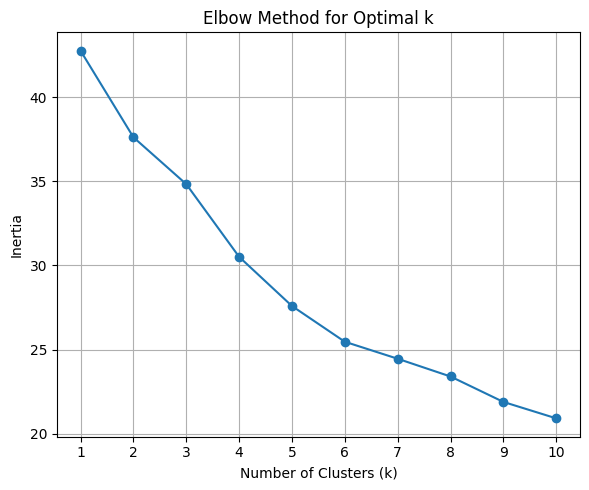

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])  # Make sure numerical_cols is defined

# Elbow Method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(6, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()



cluster = 4 because it strikes the best balance between simplicity and meaningful segmentation. In the elbow chart, inertia drops sharply from 1 to 4 clusters, showing that each new cluster adds significant value by reducing within-group variation. After 4, the curve flattens, meaning additional clusters don’t improve the model much and only make it more complex. Choosing 4 allows us to identify key differences between port groups without overwhelming the analysis. It provides clear, actionable insights for management to use when making decisions about investment, marketing, and planning future cruise routes or premium offerings.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("caribbean_ports.csv")
df.describe()

#apply k-means
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])
kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(df_scaled)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

<ipython-input-30-5eb8c5832376>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


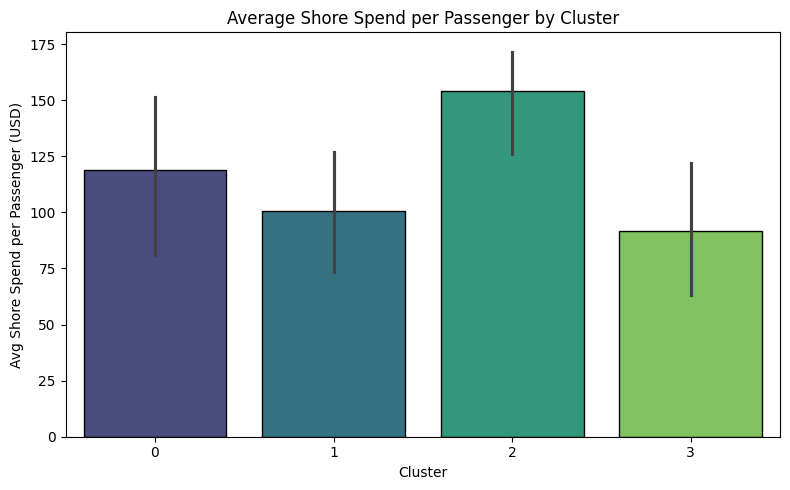

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x='cluster',
    y='avg_shore_spend_per_passenger',
    palette='viridis',
    estimator=np.mean,
    edgecolor="black"
)
plt.title('Average Shore Spend per Passenger by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Avg Shore Spend per Passenger (USD)')
plt.tight_layout()
plt.show()



The bar chart shows the average shore spend per passenger across the four clusters. Cluster 2 stands out with the highest spending, indicating that ports in this group attract passengers who spend more on shore excursions and local experiences. This could suggest premium destinations or ports with well-developed tourist infrastructure. In contrast, Cluster 3 has the lowest average spend, possibly representing budget-friendly or less-developed ports. Clusters 0 and 1 fall in the middle range. This information is valuable for management when designing cruise packages—Cluster 2 ports could support luxury offerings, while Clusters 1 and 3 might suit value-based or high-volume strategies.

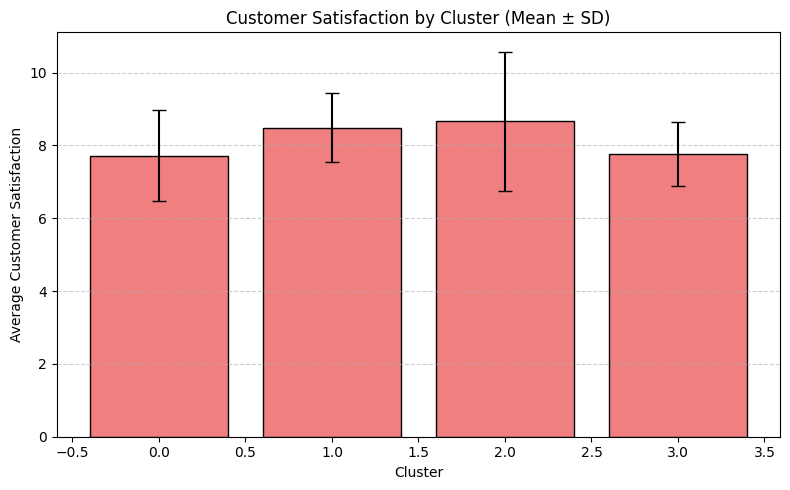

In [ ]:
# Mean satisfaction per cluster for bar + error bars
cluster_means = df.groupby('cluster')['avg_customer_satisfaction'].mean()
cluster_std = df.groupby('cluster')['avg_customer_satisfaction'].std()

plt.figure(figsize=(8, 5))
plt.bar(cluster_means.index, cluster_means, yerr=cluster_std, capsize=5, color='lightcoral', edgecolor='black')
plt.title('Customer Satisfaction by Cluster (Mean ± SD)')
plt.xlabel('Cluster')
plt.ylabel('Average Customer Satisfaction')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


This bar chart compares the average customer satisfaction scores across four port clusters. Cluster 2 stands out with the highest satisfaction rating, which suggests that ports in this group are delivering strong experiences, whether through services, excursions, or general appeal. Clusters 1 and 3 follow closely behind, showing consistent and positive feedback from visitors. In contrast, Cluster 0 shows the lowest average satisfaction, which could be a sign of underperformance or unmet expectations at those ports. This breakdown helps highlight which clusters are excelling and which may need closer attention or improvement efforts to better meet customer expectations.

<ipython-input-32-bd9449967a91>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cluster', y='avg_customer_satisfaction', palette='Set3')


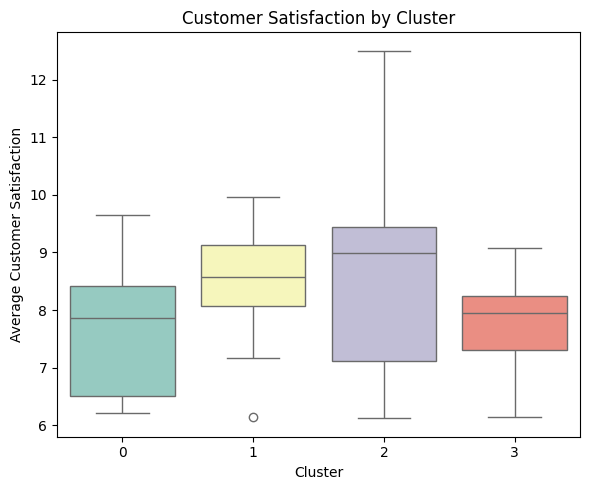

In [ ]:
#visualization
# box plot
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='cluster', y='avg_customer_satisfaction', palette='Set3')
plt.title('Customer Satisfaction by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Customer Satisfaction')
plt.tight_layout()
plt.show()


cluster 2 have the highest overall satisfaction on average, it also have some large outliners.
Cluster 1 also have high median satisfaction. Cluster 0 and 3 have low median satisfaction, espically cluster 0. Cluster 0 is more skewed, which is less than 8.
We could see that 2 have high outliners and 3 have low outliners.

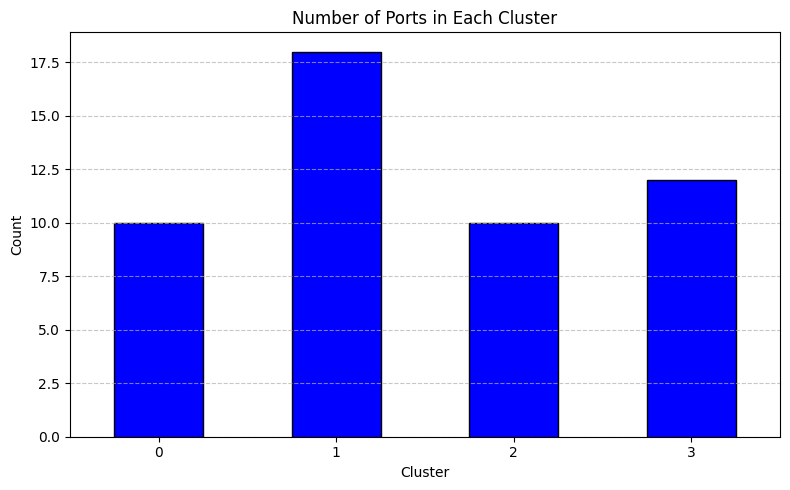

In [ ]:
# bar plot
plt.figure(figsize=(8, 5))
df['cluster'].value_counts().sort_index().plot(kind='bar', color='blue', edgecolor='black')
plt.title('Number of Ports in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This bar chart shows the number of ports in each cluster. Cluster 1 has the most ports, suggesting it represents the most common type of destination in the group. Clusters 0 and 2 have fewer ports, while Cluster 3 is slightly larger. Understanding this distribution helps with planning and prioritization. A larger cluster like Cluster 1 might be ideal for broad marketing strategies or standard cruise packages.

Cluster 1 have the most number of ports. 0 and 2 have the same.

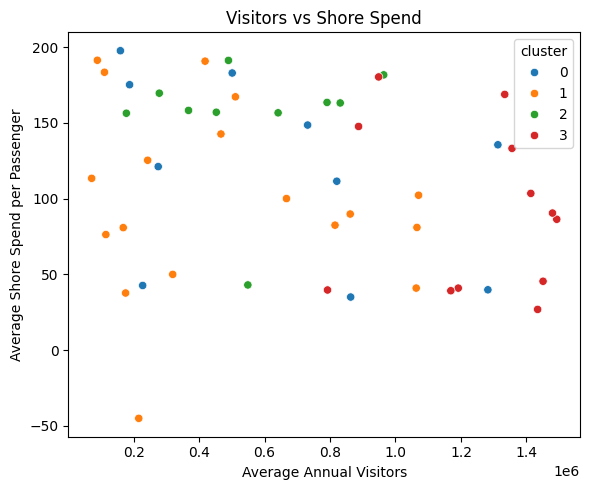

In [ ]:
# scatterplot
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x='avg_annual_visitors',
    y='avg_shore_spend_per_passenger',
    hue='cluster',
    palette='tab10'
)
plt.title('Visitors vs Shore Spend')
plt.xlabel('Average Annual Visitors')
plt.ylabel('Average Shore Spend per Passenger')
plt.tight_layout()
plt.show()




The scatter plot reveals no strong linear relationship between average annual visitors and average shore spend per passenger, suggesting that ports with more visitors don't necessarily generate higher spending, and spending behavior is likely influenced by other factors.

cluster 0:  – Popular but Low-Spending Ports:  
  These ports get lots of visitors but people don’t spend much money when they arrive. But these ports is really popular amoung customer
Cluster 1 – median Ports: Ports that do well overall, with good visitor numbers, spending, and satisfaction.
Cluster 2 – High-End Ports: customer willing to spend a lot money on it. people are very satisfied with their experience.
Cluster 3 – Busy but Struggling Ports: These ports are very crowded but have low spending and lower satisfaction.

I think lobster land should focus more on cluster 1. We can see that these cluster have the most people and with moderate customer satisfaction, this is not the most expensive one nor the most cost-effective one, but it can fit everyone the most.

Also lobster land should prioritize cluster 3 and 0 where those spending have the greatest opportunity to growth, lobster land can set up plans to boost customers.